In [1]:
# import modules and libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from data.data import *
from models.models import *

In [2]:
dataset_a = torch.load('data/CWRU/bearing/A.pt')

In [3]:
dataset_a

{'samples': tensor([[-0.0367, -0.0290, -0.0054,  ..., -0.0592, -0.0040,  0.0415],
         [-0.0302, -0.0879,  0.0093,  ..., -0.3461, -0.0960,  0.3786],
         [ 0.0552, -0.1027,  0.2448,  ..., -0.1389,  0.0093,  0.0427],
         ...,
         [-0.3188, -0.0715,  0.2851,  ...,  0.2713, -1.0558, -0.6579],
         [ 0.4666, -0.1356, -0.4179,  ...,  1.6426, -1.4583, -1.2361],
         [ 0.1876,  0.1275, -0.0864,  ...,  0.2765, -0.0988, -0.1730]]),
 'labels': tensor([0, 8, 2,  ..., 7, 3, 1])}

In [4]:
print(f"The number of samples in domain A for the CWRU dataset is {dataset_a['samples'].shape[0]}.")
print(f"The length of a sequence sample is {dataset_a['samples'].shape[1]}.")
print(f"The distribution of classes in domain A for the CWRU dataset is {dataset_a['labels'].unique(return_counts=True)}.")

The number of samples in domain A for the CWRU dataset is 4000.
The length of a sequence sample is 4096.
The distribution of classes in domain A for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([416, 371, 409, 417, 387, 408, 398, 407, 383, 404])).


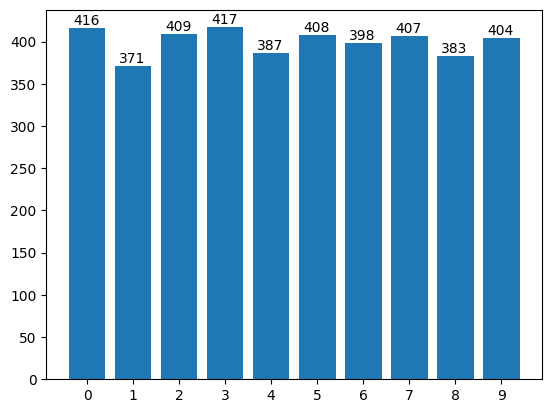

In [5]:
plt.bar(dataset_a['labels'].unique(return_counts=True)[0].numpy().astype(str), dataset_a['labels'].unique(return_counts=True)[1].numpy())
for index, value in enumerate(dataset_a['labels'].unique(return_counts=True)[1].numpy()):
    plt.text(index - .3, value + 4, str(value))
plt.show()

The class is 0.


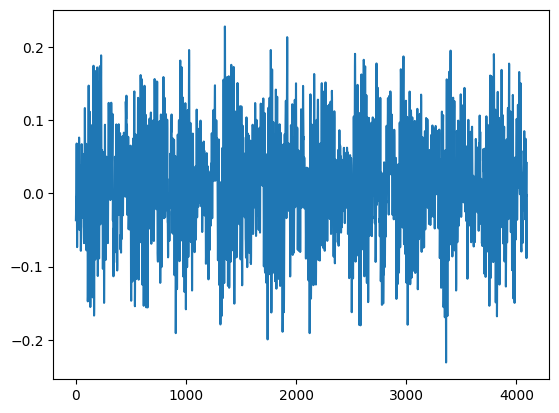

In [6]:
print(f"The class is {dataset_a['labels'][0]}.")
plt.plot(dataset_a['samples'][0].numpy())

In [7]:
dataset_a['labels'].unique(return_counts=True)[1]

tensor([416, 371, 409, 417, 387, 408, 398, 407, 383, 404])

In [8]:
def print_details(domain, dataset):
    print(f"The number of samples in domain {domain} for the CWRU dataset is {dataset['samples'].shape[0]}.")
    print(f"The length of a sequence sample is {dataset['samples'].shape[1]}.")
    print(f"The distribution of classes in domain {domain} for the CWRU dataset is {dataset['labels'].unique(return_counts=True)}.\n")

In [9]:
domains = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for domain in domains:
    dataset = torch.load(os.path.join('data/CWRU/bearing/', domain + '.pt'))
    print_details(domain, dataset)

The number of samples in domain A for the CWRU dataset is 4000.
The length of a sequence sample is 4096.
The distribution of classes in domain A for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([416, 371, 409, 417, 387, 408, 398, 407, 383, 404])).

The number of samples in domain B for the CWRU dataset is 4000.
The length of a sequence sample is 4096.
The distribution of classes in domain B for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([416, 371, 409, 417, 387, 408, 398, 407, 383, 404])).

The number of samples in domain C for the CWRU dataset is 4000.
The length of a sequence sample is 4096.
The distribution of classes in domain C for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([416, 371, 409, 417, 387, 408, 398, 407, 383, 404])).

The number of samples in domain D for the CWRU dataset is 4000.
The length of a sequence sample is 4096.
The distribution of classes in domain D for the CWRU dataset is (tensor([0, 1, 

In [10]:
path = 'data/CWRU/bearing/'

train_dataloaders, val_dataloaders, test_dataloaders = [], [], []
for domain in domains:
    train_dataloader_temp, val_dataloader_temp, test_dataloader_temp = generate_dataloaders(path, domain, 20)
    
    train_dataloaders.append(train_dataloader_temp)
    val_dataloaders.append(val_dataloader_temp)
    test_dataloaders.append(test_dataloader_temp)

In [11]:
train_dataloaders[0].dataset.labels.unique(return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([253, 231, 254, 255, 238, 245, 229, 237, 217, 241]))

In [12]:
train_dataloaders[1].dataset.labels.unique(return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([253, 231, 254, 255, 238, 245, 229, 237, 217, 241]))

In [13]:
def print_details_in_dataloader(domain, dataset):
    print(f"The number of samples in domain {domain} for the CWRU dataset is {dataset.data.shape[0]}.")
    print(f"The length of a sequence sample is {dataset.data.shape[2]}.")
    print(f"The distribution of classes in domain {domain} for the CWRU dataset is {dataset.labels.unique(return_counts=True)}.\n")

In [14]:
for i in range(len(domains)):
    print_details_in_dataloader(domains[i], train_dataloaders[i].dataset)
    print_details_in_dataloader(domains[i], val_dataloaders[i].dataset)
    print_details_in_dataloader(domains[i], test_dataloaders[i].dataset)

The number of samples in domain A for the CWRU dataset is 2400.
The length of a sequence sample is 4096.
The distribution of classes in domain A for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([253, 231, 254, 255, 238, 245, 229, 237, 217, 241])).

The number of samples in domain A for the CWRU dataset is 800.
The length of a sequence sample is 4096.
The distribution of classes in domain A for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([92, 67, 77, 90, 73, 88, 70, 75, 81, 87])).

The number of samples in domain A for the CWRU dataset is 800.
The length of a sequence sample is 4096.
The distribution of classes in domain A for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([71, 73, 78, 72, 76, 75, 99, 95, 85, 76])).

The number of samples in domain B for the CWRU dataset is 2400.
The length of a sequence sample is 4096.
The distribution of classes in domain B for the CWRU dataset is (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9

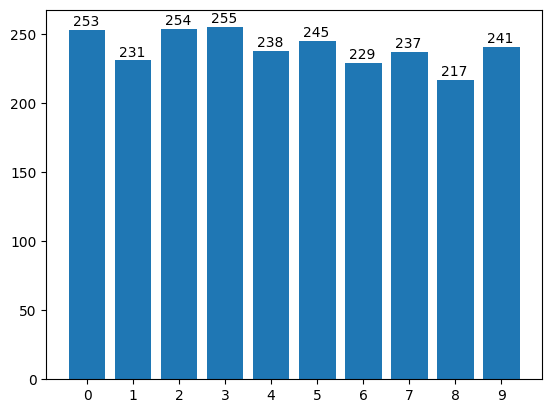

In [27]:
plt.bar(train_dataloaders[0].dataset.labels.unique(return_counts=True)[0].numpy().astype(str), train_dataloaders[0].dataset.labels.unique(return_counts=True)[1].numpy())
for index, value in enumerate(train_dataloaders[0].dataset.labels.unique(return_counts=True)[1].numpy()):
    plt.text(index - .3, value + 3, str(value))
plt.show()

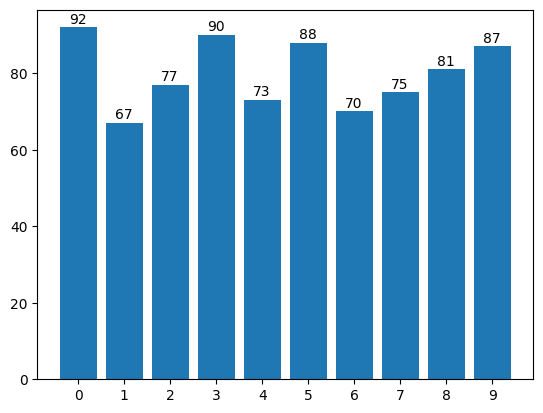

In [28]:
plt.bar(val_dataloaders[0].dataset.labels.unique(return_counts=True)[0].numpy().astype(str), val_dataloaders[0].dataset.labels.unique(return_counts=True)[1].numpy())
for index, value in enumerate(val_dataloaders[0].dataset.labels.unique(return_counts=True)[1].numpy()):
    plt.text(index - .2, value + 1, str(value))
plt.show()

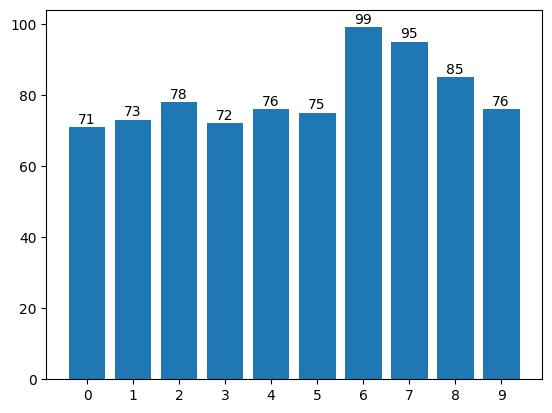

In [29]:
plt.bar(test_dataloaders[0].dataset.labels.unique(return_counts=True)[0].numpy().astype(str), test_dataloaders[0].dataset.labels.unique(return_counts=True)[1].numpy())
for index, value in enumerate(test_dataloaders[0].dataset.labels.unique(return_counts=True)[1].numpy()):
    plt.text(index - .2, value + 1, str(value))
plt.show()

In [18]:
def plot_sample_in_dataloader(domain, dataset):
    print(domain)
    print(f"The class is {dataset.labels[0]}.")
    plt.plot(dataset.data[0][0].numpy())
    plt.show()

A
The class is 6.


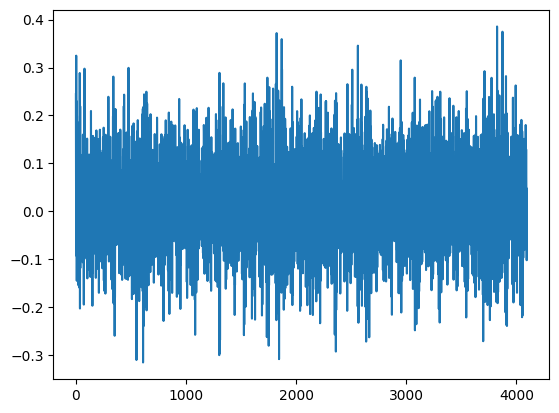

B
The class is 6.


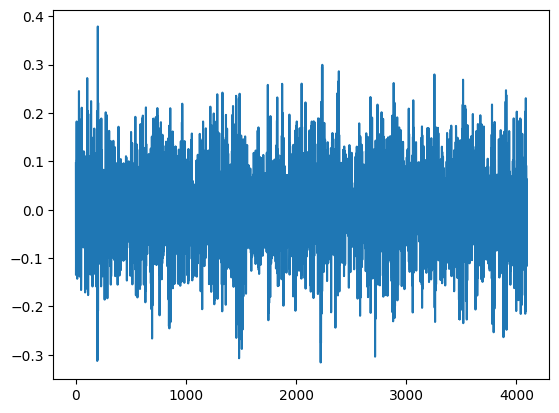

C
The class is 6.


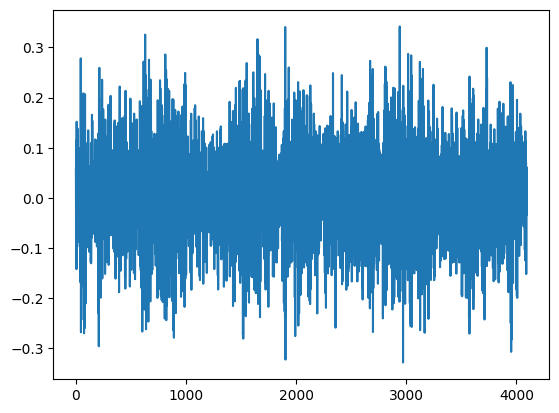

D
The class is 6.


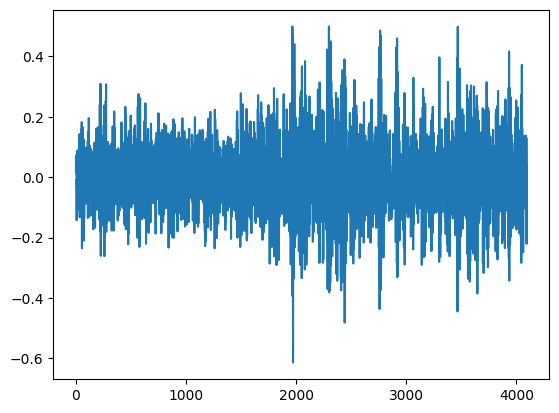

E
The class is 6.


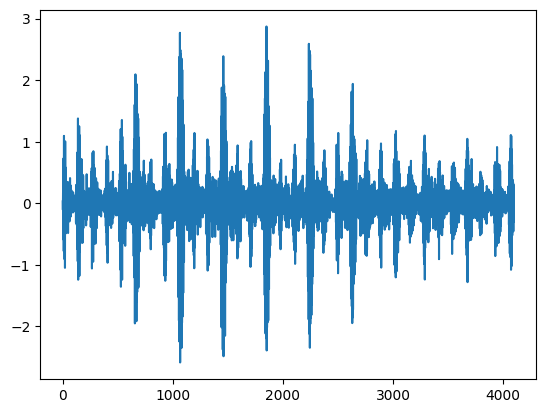

F
The class is 6.


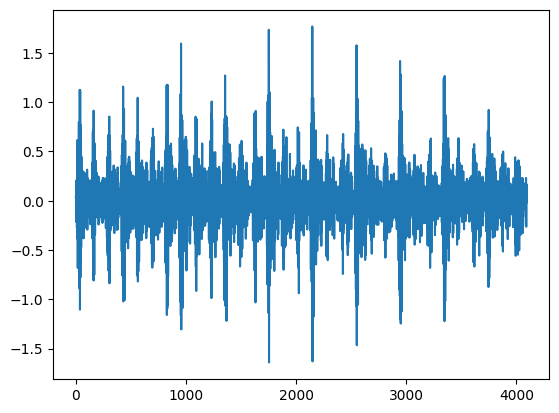

G
The class is 6.


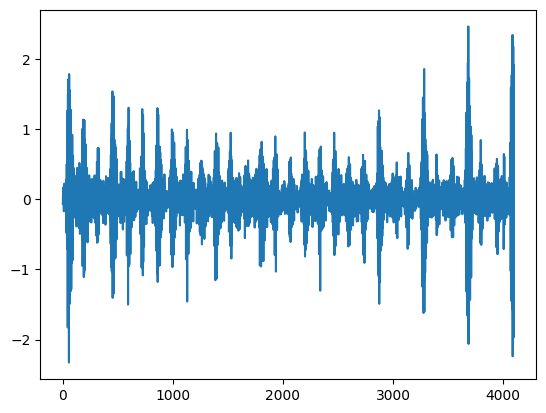

H
The class is 6.


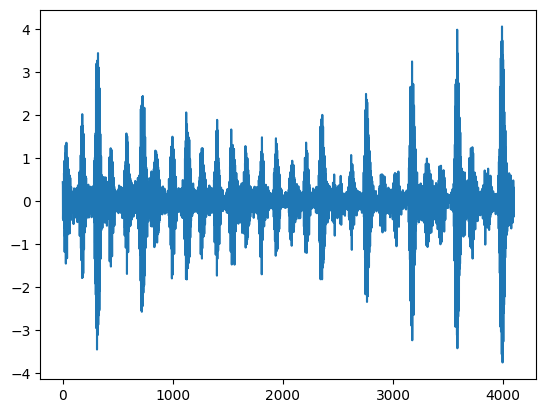

In [19]:
for i in range(len(domains)):
    plot_sample_in_dataloader(domains[i], train_dataloaders[i].dataset)

In [20]:
dict_temp = {'methods': ['Source-only', 'ADDA', 'CUA (with ADDA)', 'Supervised'], \
    'A': [99, 99, 99, 99], 'B': [62, 85, 91, 100], \
    'C': [61, 91, 94, 100], 'D': [58, 84, 93, 100], \
    'E': [27, 23, 28, 93], 'F': [23, 17, 41, 96], \
    'G': [25, 19, 34, 99], 'H': [25, 19, 36, 99]}

<AxesSubplot: >

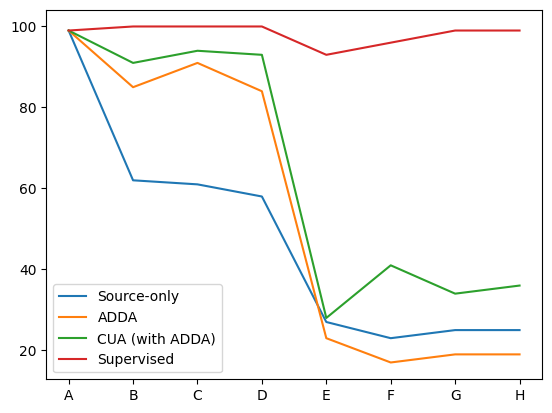

In [21]:
df1 = pd.DataFrame({
    'Source-only': [99, 62, 61, 58, 27, 23, 25, 25],
    'ADDA': [99, 85, 91, 84, 23, 17, 19, 19],
    'CUA (with ADDA)': [99, 91, 94, 93, 28, 41, 34, 36],
    'Supervised': [99, 100, 100, 100, 93, 96, 99, 99]
}, index=domains)
df1.plot.line()

<AxesSubplot: >

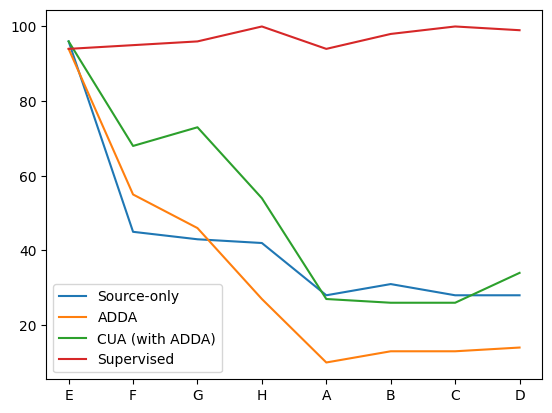

In [22]:
df2 = pd.DataFrame({
    'Source-only': [96, 45, 43, 42, 28, 31, 28, 28],
    'ADDA': [94, 55, 46, 27, 10, 13, 13, 14],
    'CUA (with ADDA)': [96, 68, 73, 54, 27, 26, 26, 34],
    'Supervised': [94, 95, 96, 100, 94, 98, 100, 99]
}, index=['E', 'F', 'G', 'H', 'A', 'B', 'C', 'D'])
df2.plot.line()